In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving crime_data.csv to crime_data.csv


In [ ]:
df = pd.read_csv("crime_data.csv")
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [ ]:
df.rename({'Unnamed: 0':'States'}, axis=1, inplace=True)
df.head(10)

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [ ]:
df.shape

(50, 5)

# EDA

In [ ]:
df.isna().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [ ]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


### Creating Histograms

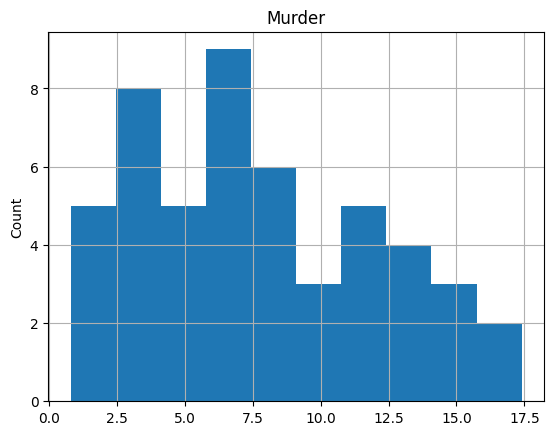

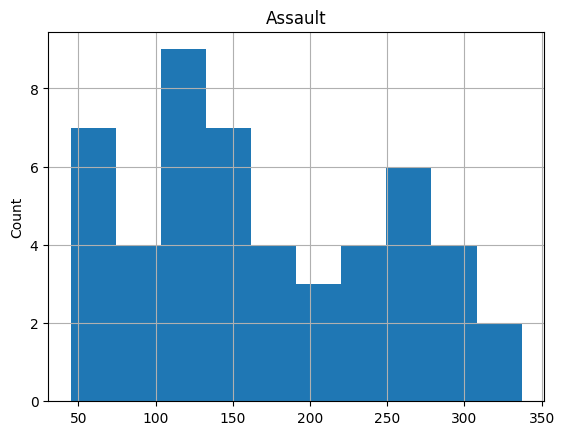

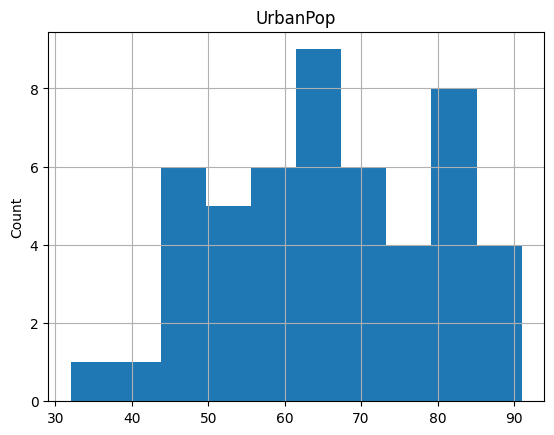

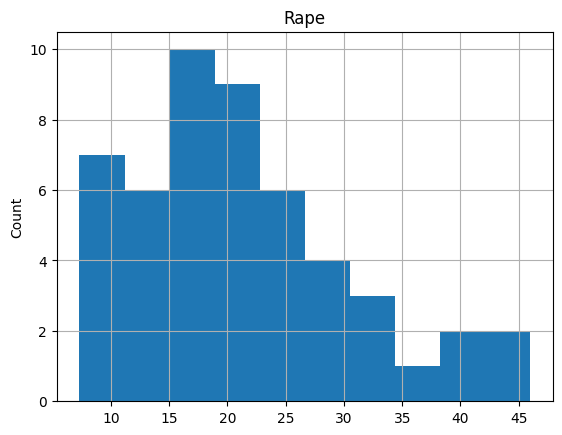

In [ ]:
for feature in df.iloc[:,1:]:
    df[feature].hist(bins=10)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Murder


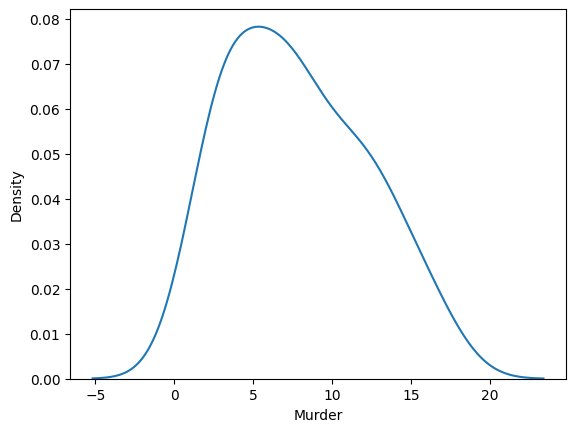

Assault


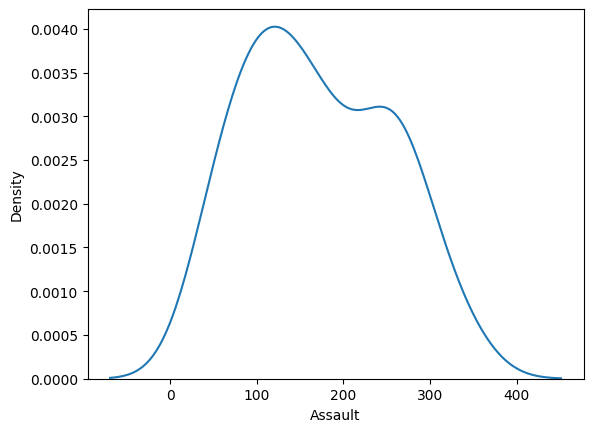

UrbanPop


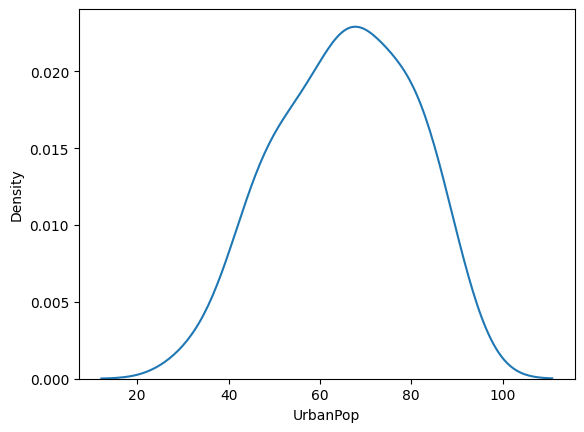

Rape


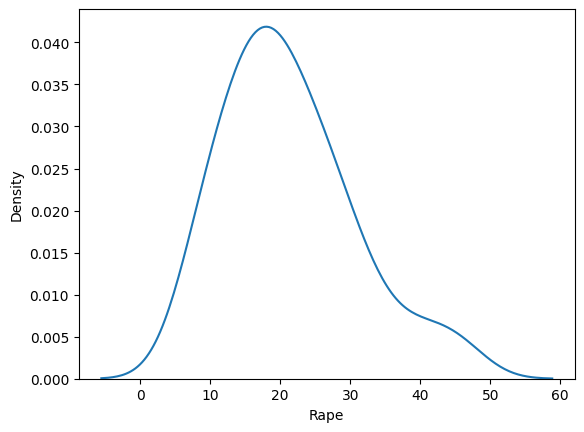

In [ ]:
# Kernel Density for every feature, singled out

for n in df.iloc[:, 1:]:
    print(n)
    sb.kdeplot(df[n])
    plt.show()

# Outlier Detection

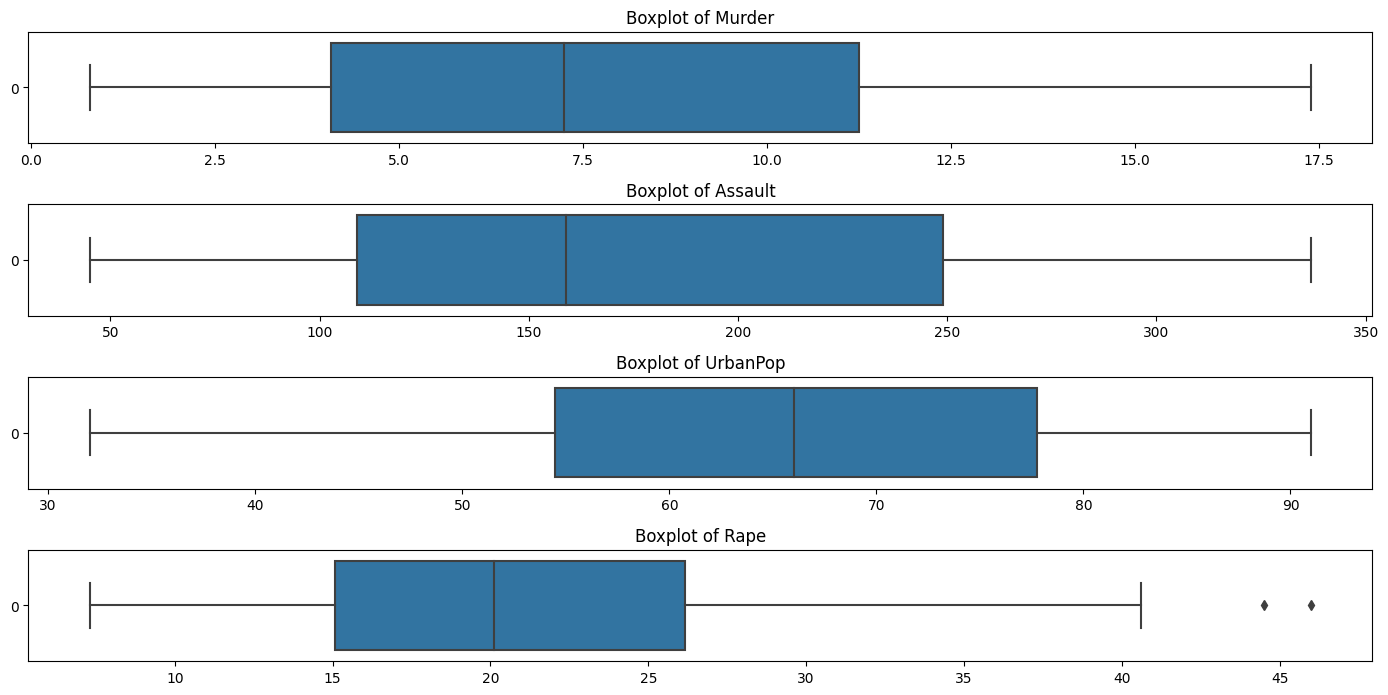

In [ ]:
columns_to_plot = ['Murder', 'Assault', 'UrbanPop', 'Rape']

plt.figure(figsize = (14, 12))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(7, 1, i)
    sb.boxplot(data=df[column], orient='h')
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

# Data Visualization

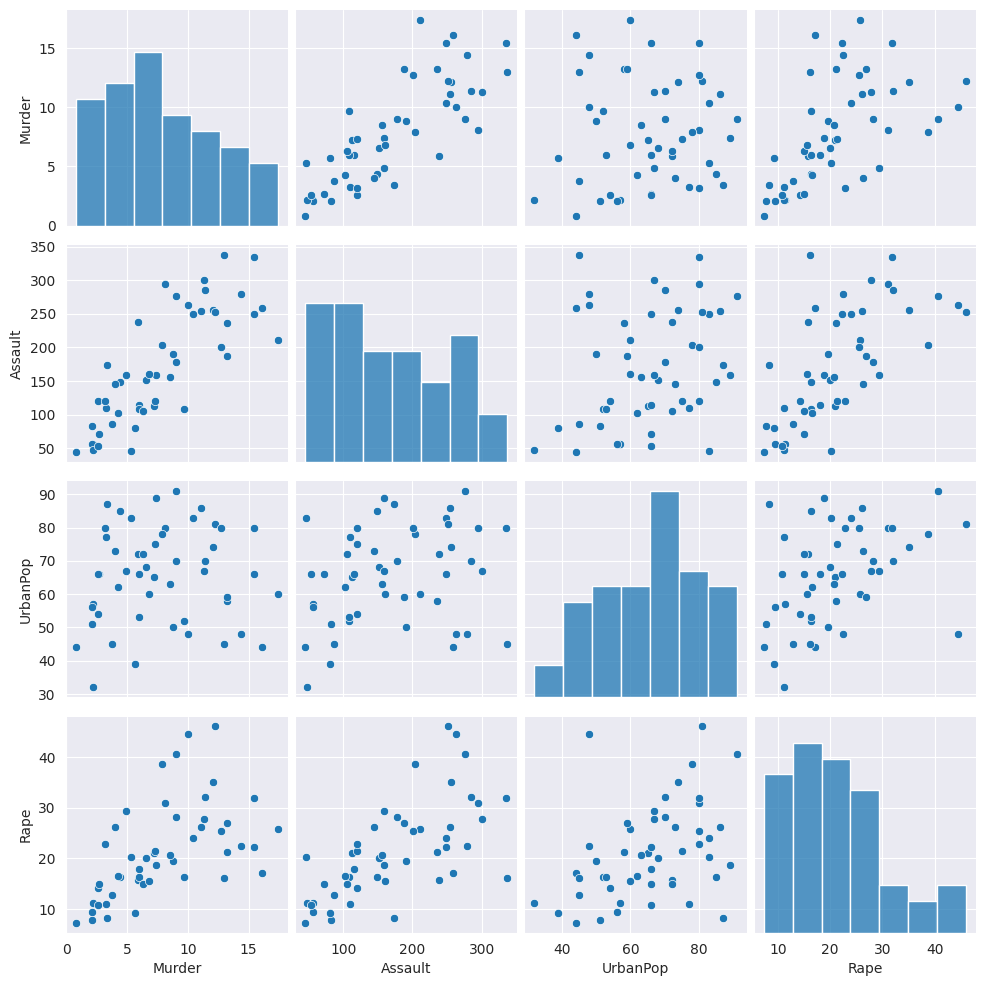

In [ ]:
sb.set_style(style='darkgrid')
sb.pairplot(df)

<Axes: >

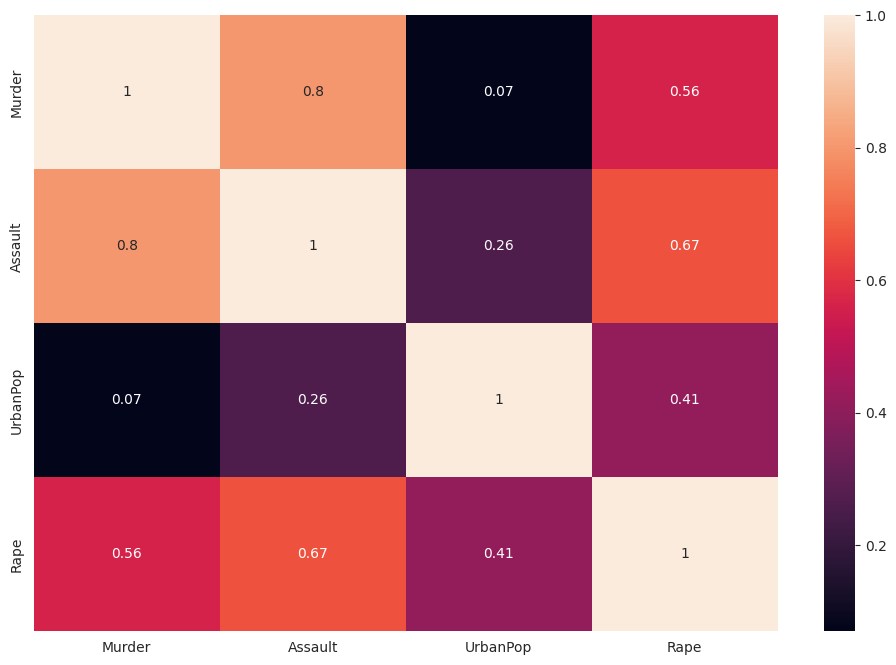

In [ ]:
plt.figure(figsize=(12,8))
sb.heatmap(
    df.iloc[:,1:].corr(),
    annot=True)

## Murder Rate

In [ ]:
data = df.copy()

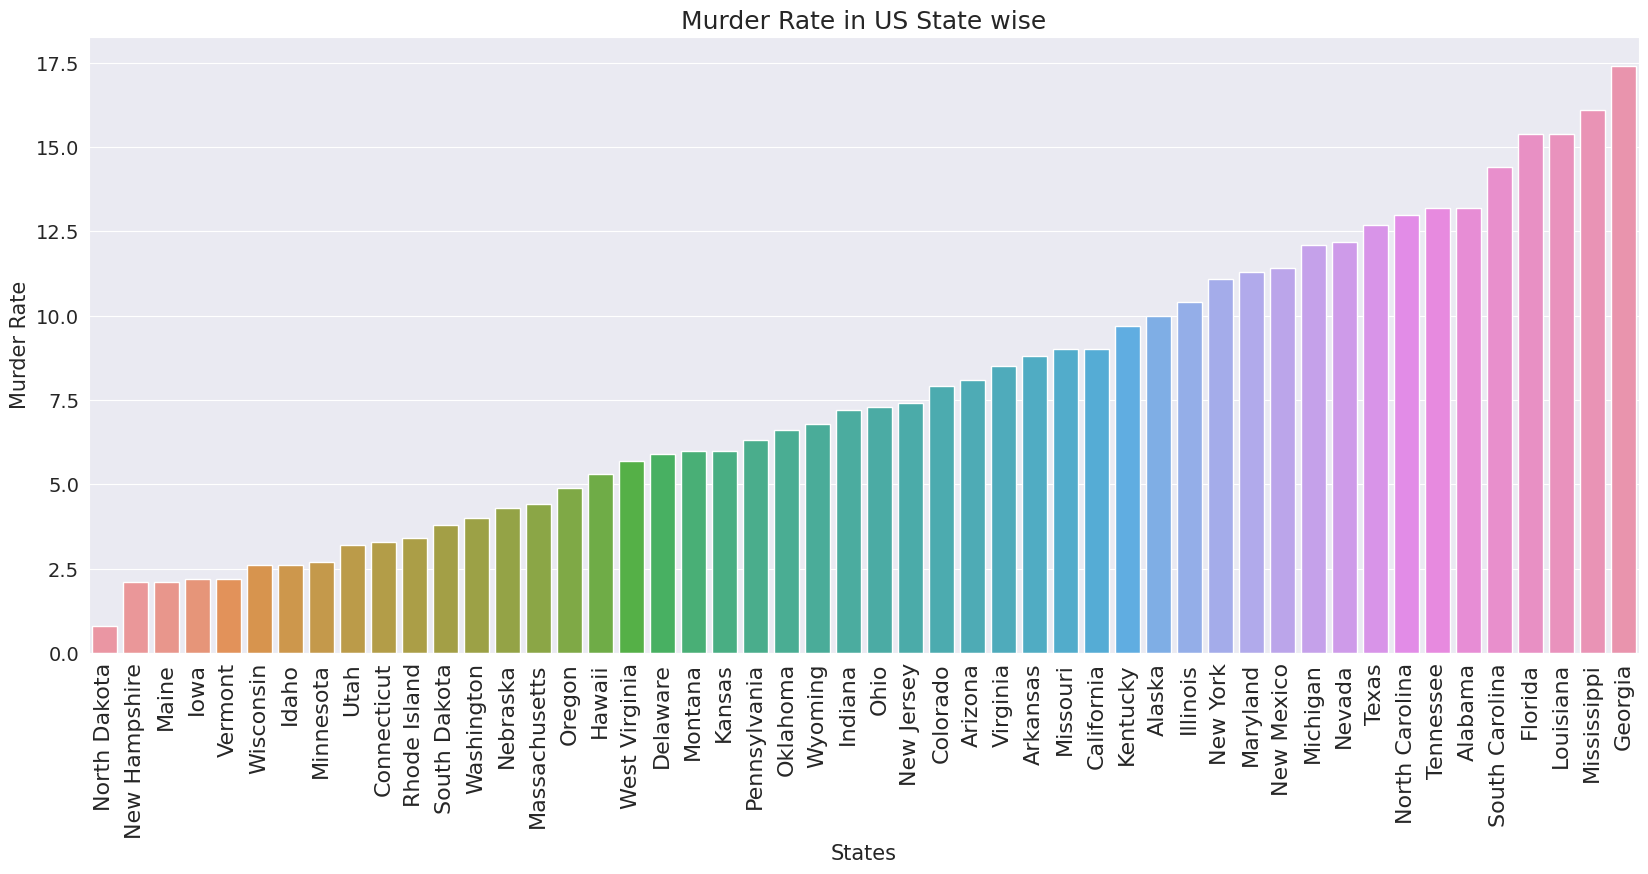

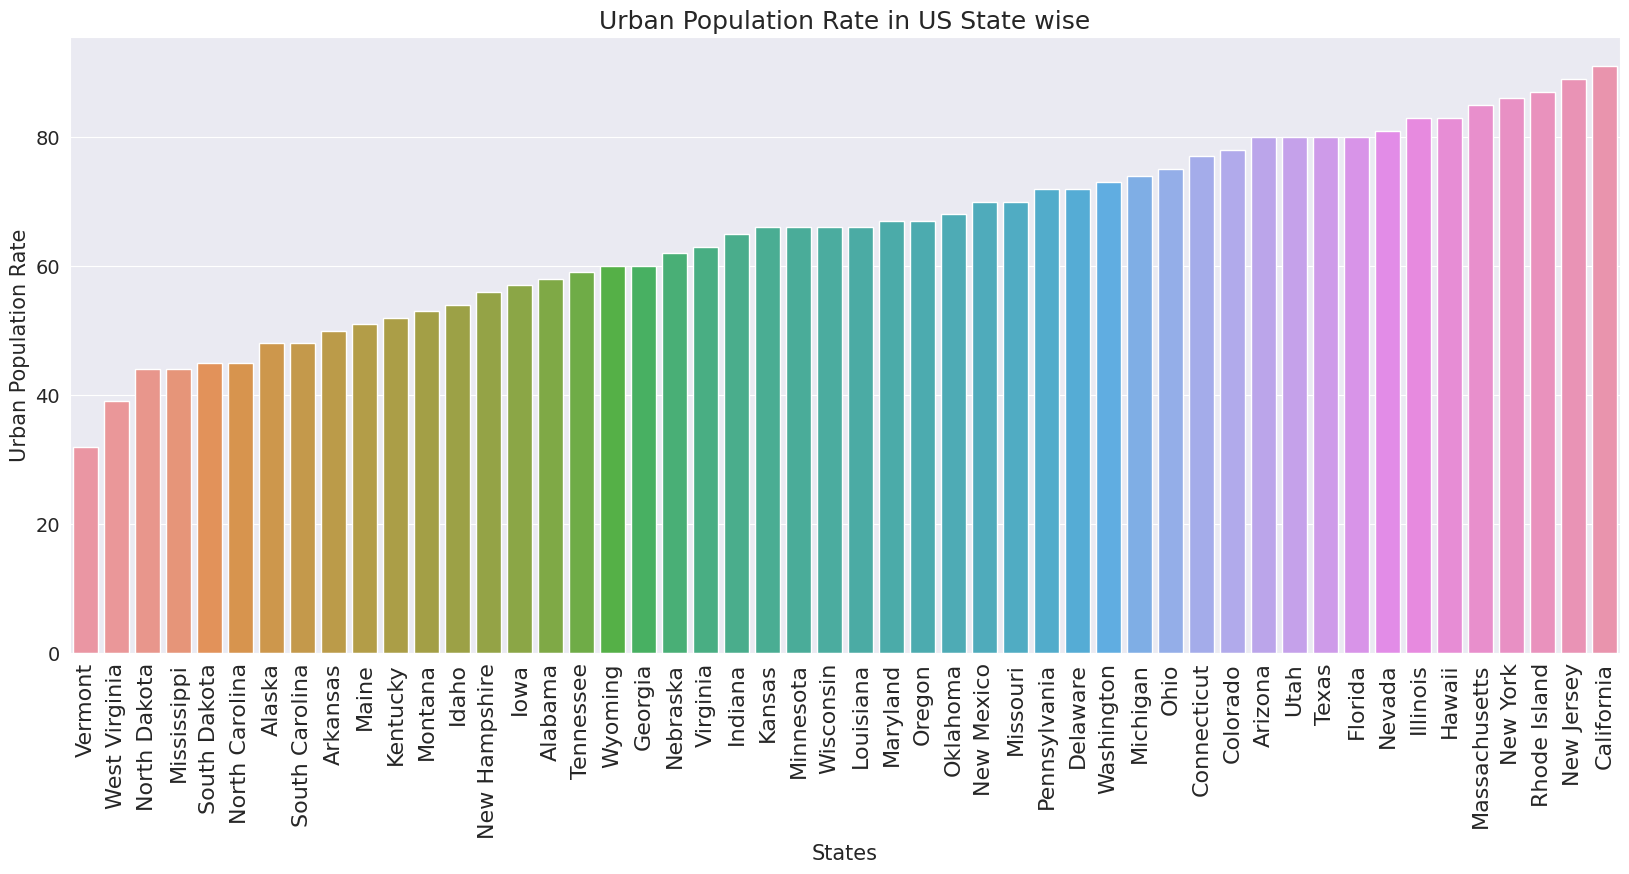

In [ ]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sb.barplot(x='States',
            y="Murder",
            data=data,
            order=data.sort_values('Murder').States)
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Murder Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Murder Rate in US State wise", size=18)
plt.show()

plt.figure(figsize=(20,8))
# make barplot and sort bars
sb.barplot(x='States',
            y="UrbanPop",
            data=data,
            order=data.sort_values('UrbanPop').States)
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Urban Population Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Urban Population Rate in US State wise", size=18)
plt.show()

In [ ]:
print('Top 10 States with Highest Murder Rate')
data.sort_values('Murder',ascending=False).head(10)

Top 10 States with Highest Murder Rate


,States,Murder,Assault,UrbanPop,Rape
9,Georgia,17.4,211,60,25.8
23,Mississippi,16.1,259,44,17.1
8,Florida,15.4,335,80,31.9
17,Louisiana,15.4,249,66,22.2
39,South Carolina,14.4,279,48,22.5
0,Alabama,13.2,236,58,21.2
41,Tennessee,13.2,188,59,26.9
32,North Carolina,13.0,337,45,16.1
42,Texas,12.7,201,80,25.5
27,Nevada,12.2,252,81,46.0


In [ ]:
print('Top 10 States with Lowest Murder Rate')
data.sort_values('Murder',ascending=True).head(10)

Top 10 States with Lowest Murder Rate


,States,Murder,Assault,UrbanPop,Rape
33,North Dakota,0.8,45,44,7.3
28,New Hampshire,2.1,57,56,9.5
18,Maine,2.1,83,51,7.8
14,Iowa,2.2,56,57,11.3
44,Vermont,2.2,48,32,11.2
48,Wisconsin,2.6,53,66,10.8
11,Idaho,2.6,120,54,14.2
22,Minnesota,2.7,72,66,14.9
43,Utah,3.2,120,80,22.9
6,Connecticut,3.3,110,77,11.1


In [ ]:
murder = data.sort_values('Murder', ascending = False, ignore_index=True)
murder.head()

,States,Murder,Assault,UrbanPop,Rape
0,Georgia,17.4,211,60,25.8
1,Mississippi,16.1,259,44,17.1
2,Florida,15.4,335,80,31.9
3,Louisiana,15.4,249,66,22.2
4,South Carolina,14.4,279,48,22.5


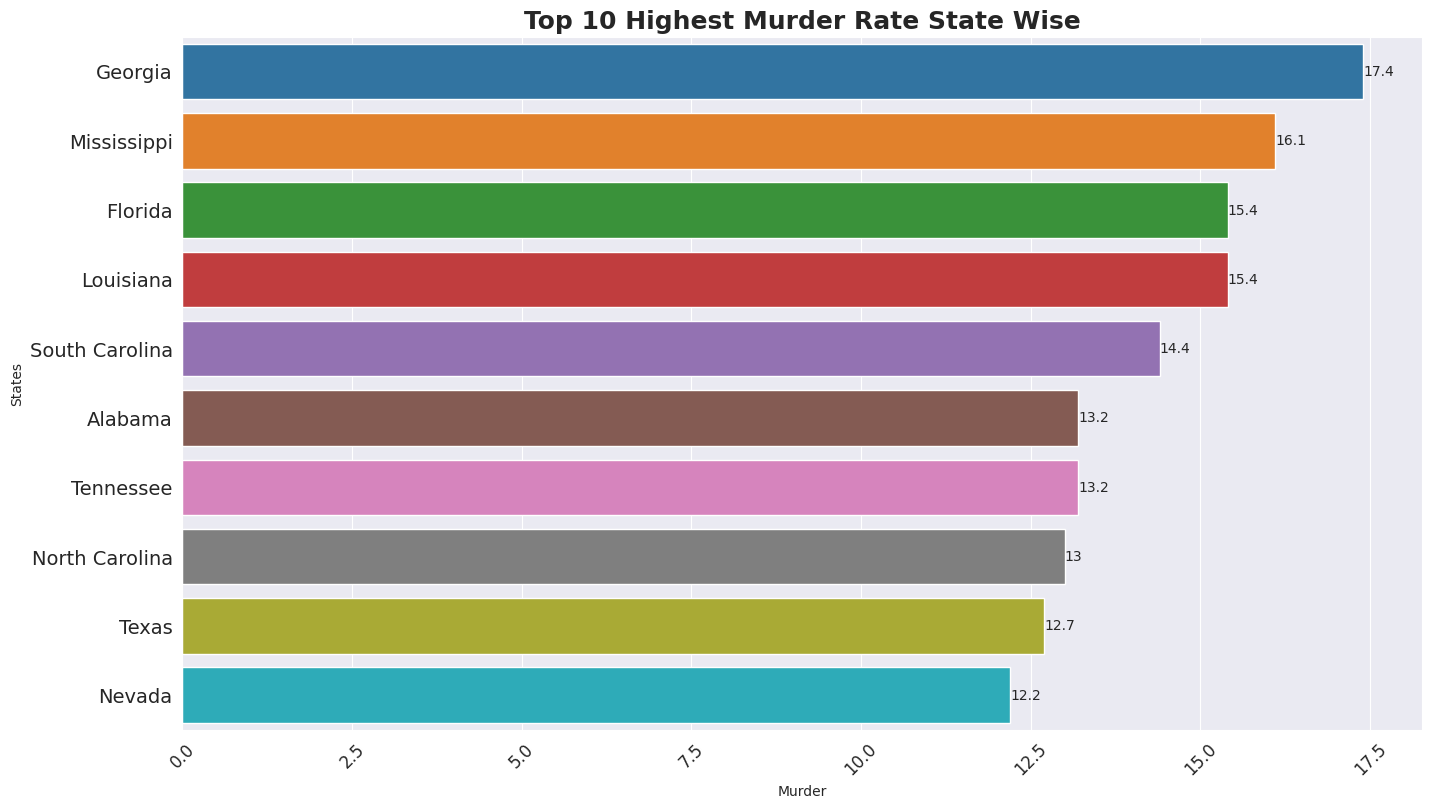

In [ ]:
plt.figure(figsize = (16,9))
ax = sb.barplot(x = murder.Murder[:10], y = murder.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Highest Murder Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
murder = data.sort_values('Murder', ascending = True,ignore_index=True)
murder.head()

,States,Murder,Assault,UrbanPop,Rape
0,North Dakota,0.8,45,44,7.3
1,New Hampshire,2.1,57,56,9.5
2,Maine,2.1,83,51,7.8
3,Iowa,2.2,56,57,11.3
4,Vermont,2.2,48,32,11.2


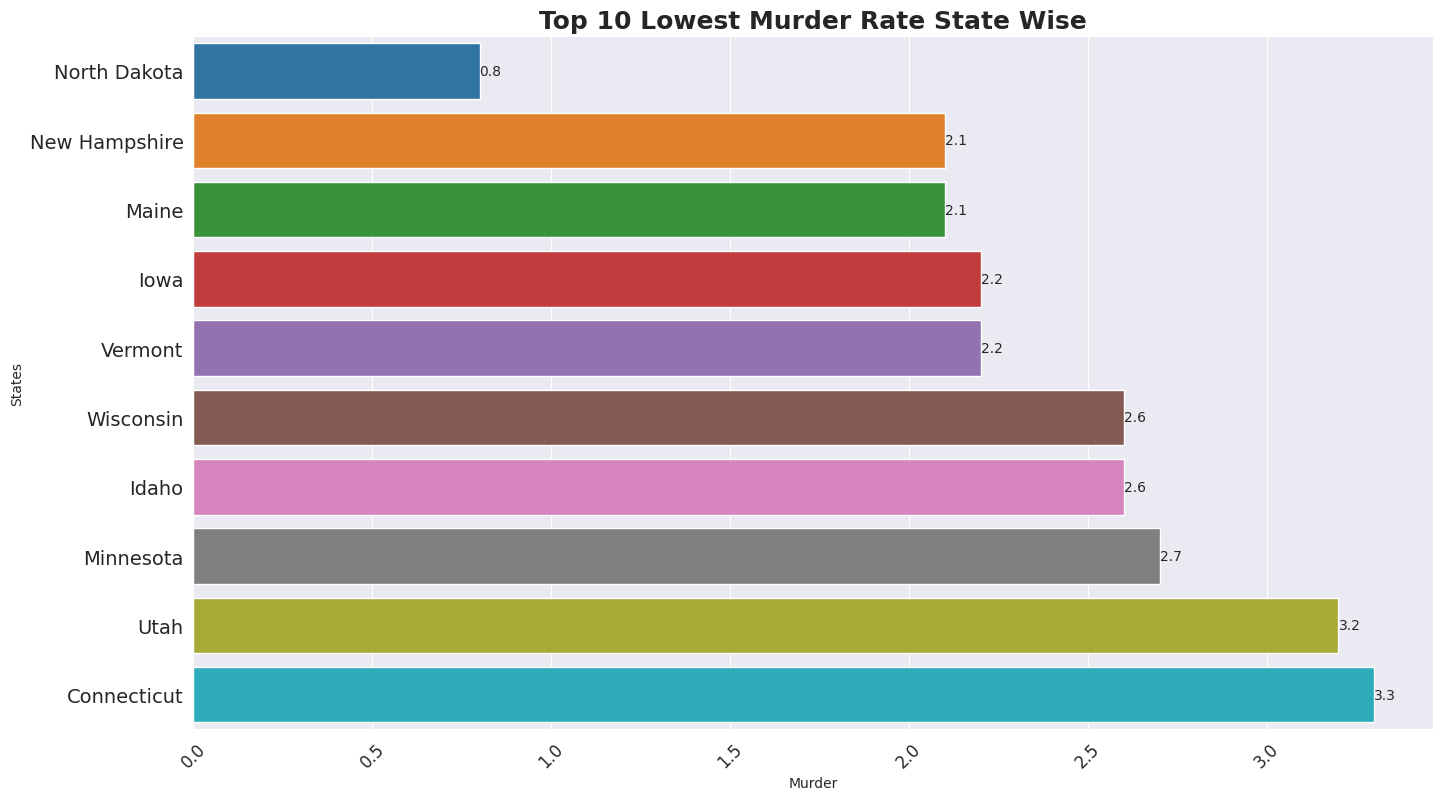

In [ ]:
plt.figure(figsize = (16,9))
ax = sb.barplot(x = murder.Murder[:10], y = murder.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Lowest Murder Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

## Assault Rate

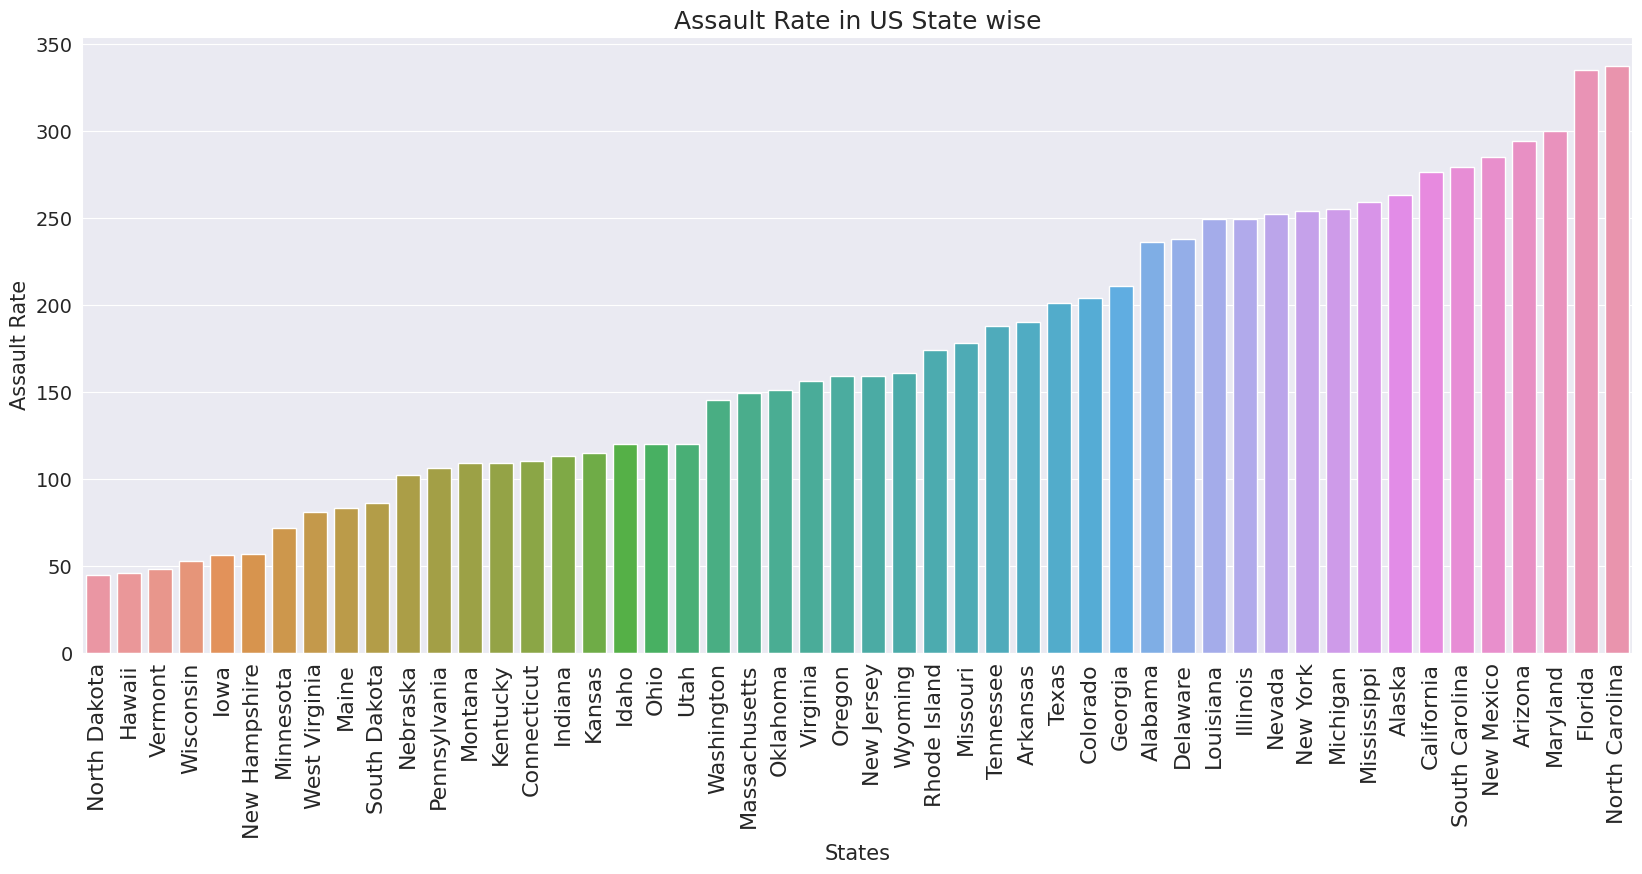

In [ ]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sb.barplot(x='States',
            y="Assault",
            data=df,
            order=data.sort_values('Assault').States)
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Assault Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Assault Rate in US State wise", size=18)
plt.show()


In [ ]:
print('Top 10 States with Highest Assault Rate')
data.sort_values('Assault',ascending=False, ignore_index=True).head(10)

Top 10 States with Highest Assault Rate


,States,Murder,Assault,UrbanPop,Rape
0,North Carolina,13.0,337,45,16.1
1,Florida,15.4,335,80,31.9
2,Maryland,11.3,300,67,27.8
3,Arizona,8.1,294,80,31.0
4,New Mexico,11.4,285,70,32.1
5,South Carolina,14.4,279,48,22.5
6,California,9.0,276,91,40.6
7,Alaska,10.0,263,48,44.5
8,Mississippi,16.1,259,44,17.1
9,Michigan,12.1,255,74,35.1


In [ ]:
print('Top 10 States with Highest Assault Rate')
data.sort_values('Assault',ascending=False, ignore_index=True).head(10)

Top 10 States with Highest Assault Rate


,States,Murder,Assault,UrbanPop,Rape
0,North Carolina,13.0,337,45,16.1
1,Florida,15.4,335,80,31.9
2,Maryland,11.3,300,67,27.8
3,Arizona,8.1,294,80,31.0
4,New Mexico,11.4,285,70,32.1
5,South Carolina,14.4,279,48,22.5
6,California,9.0,276,91,40.6
7,Alaska,10.0,263,48,44.5
8,Mississippi,16.1,259,44,17.1
9,Michigan,12.1,255,74,35.1


In [ ]:
Assault = data.sort_values('Assault', ascending = False)

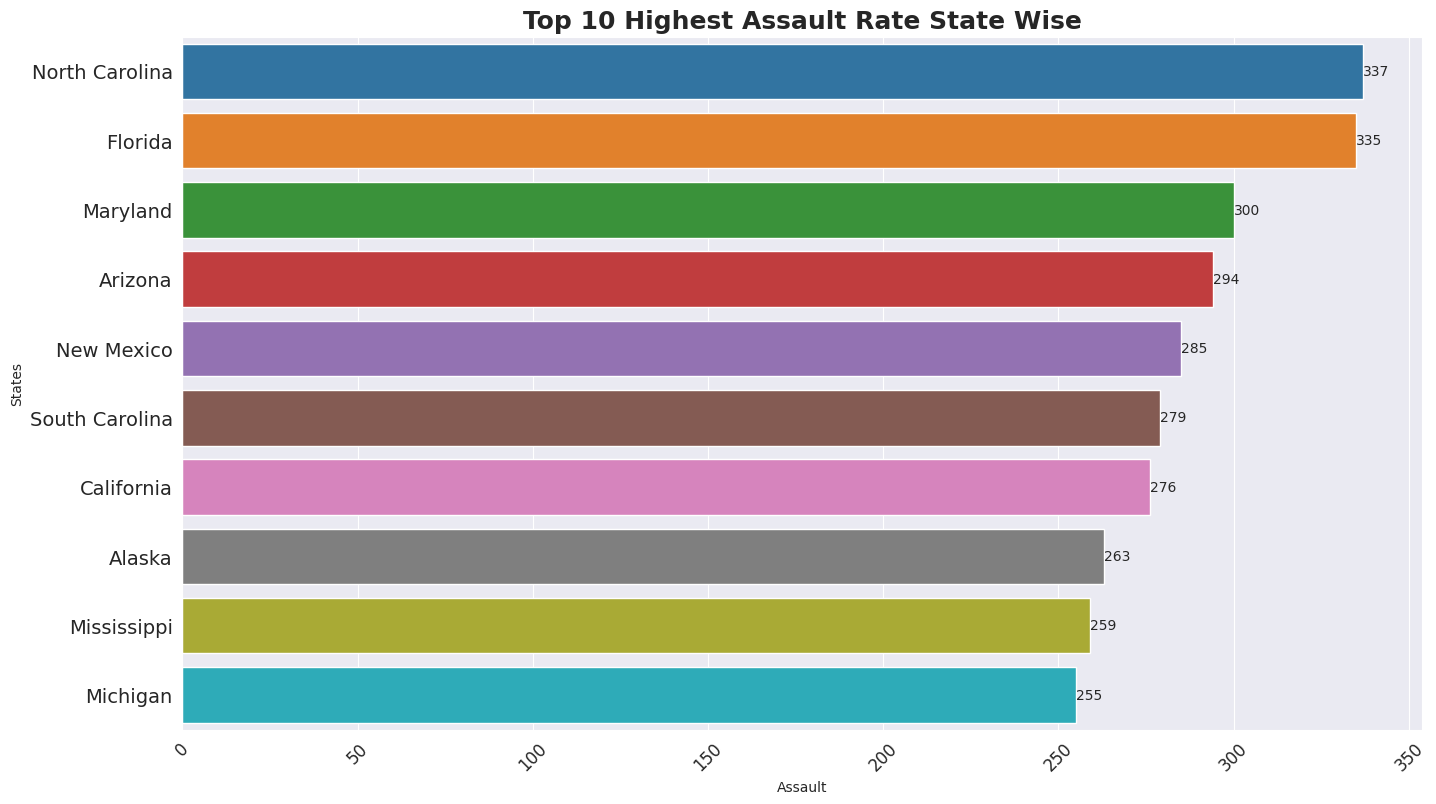

In [ ]:
plt.figure(figsize = (16,9))
ax = sb.barplot(x = Assault.Assault[:10], y = Assault.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Highest Assault Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

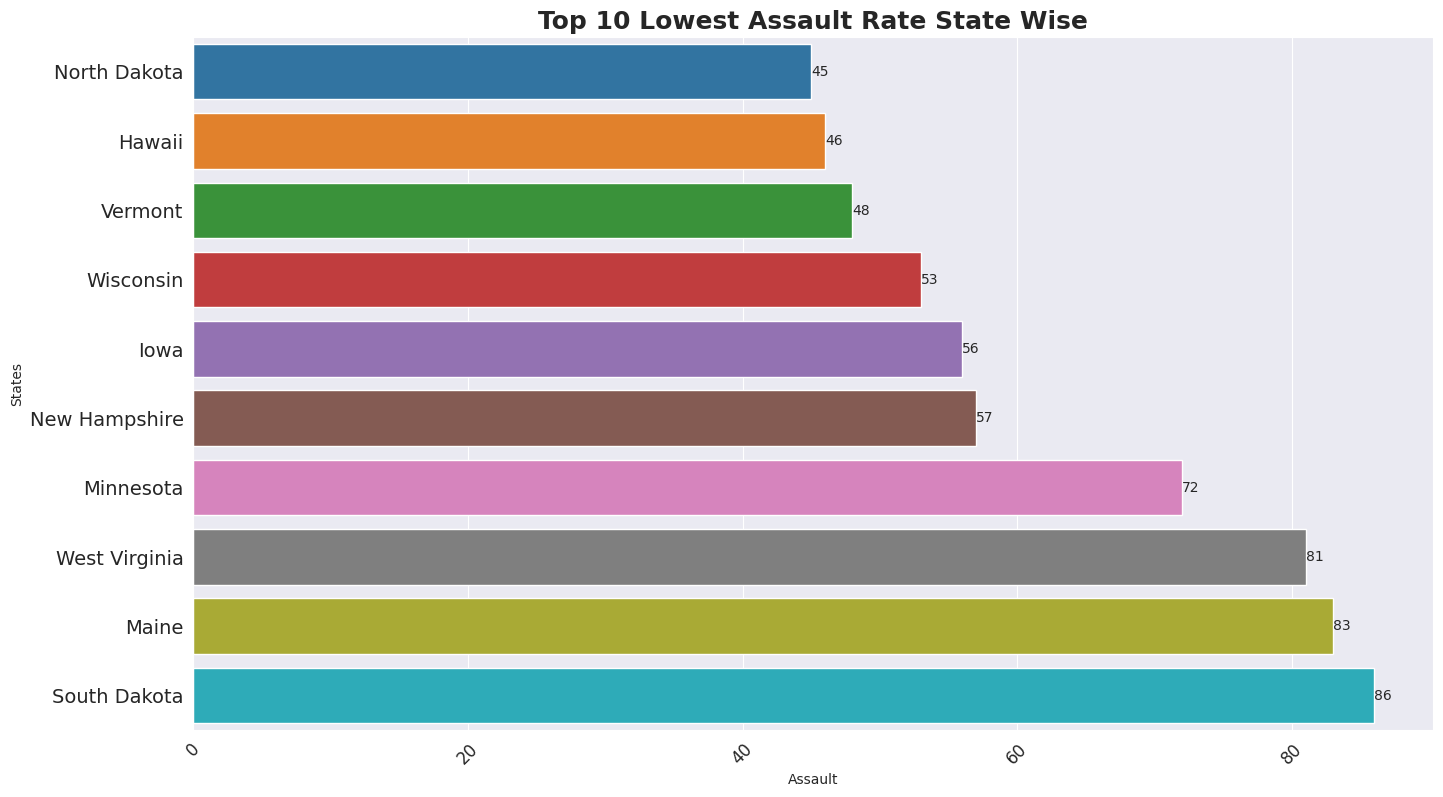

In [ ]:
assault = data.sort_values('Assault', ascending = True)
plt.figure(figsize = (16,9))
ax = sb.barplot(x = assault.Assault[:10], y = assault.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Lowest Assault Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

## Rape Rate

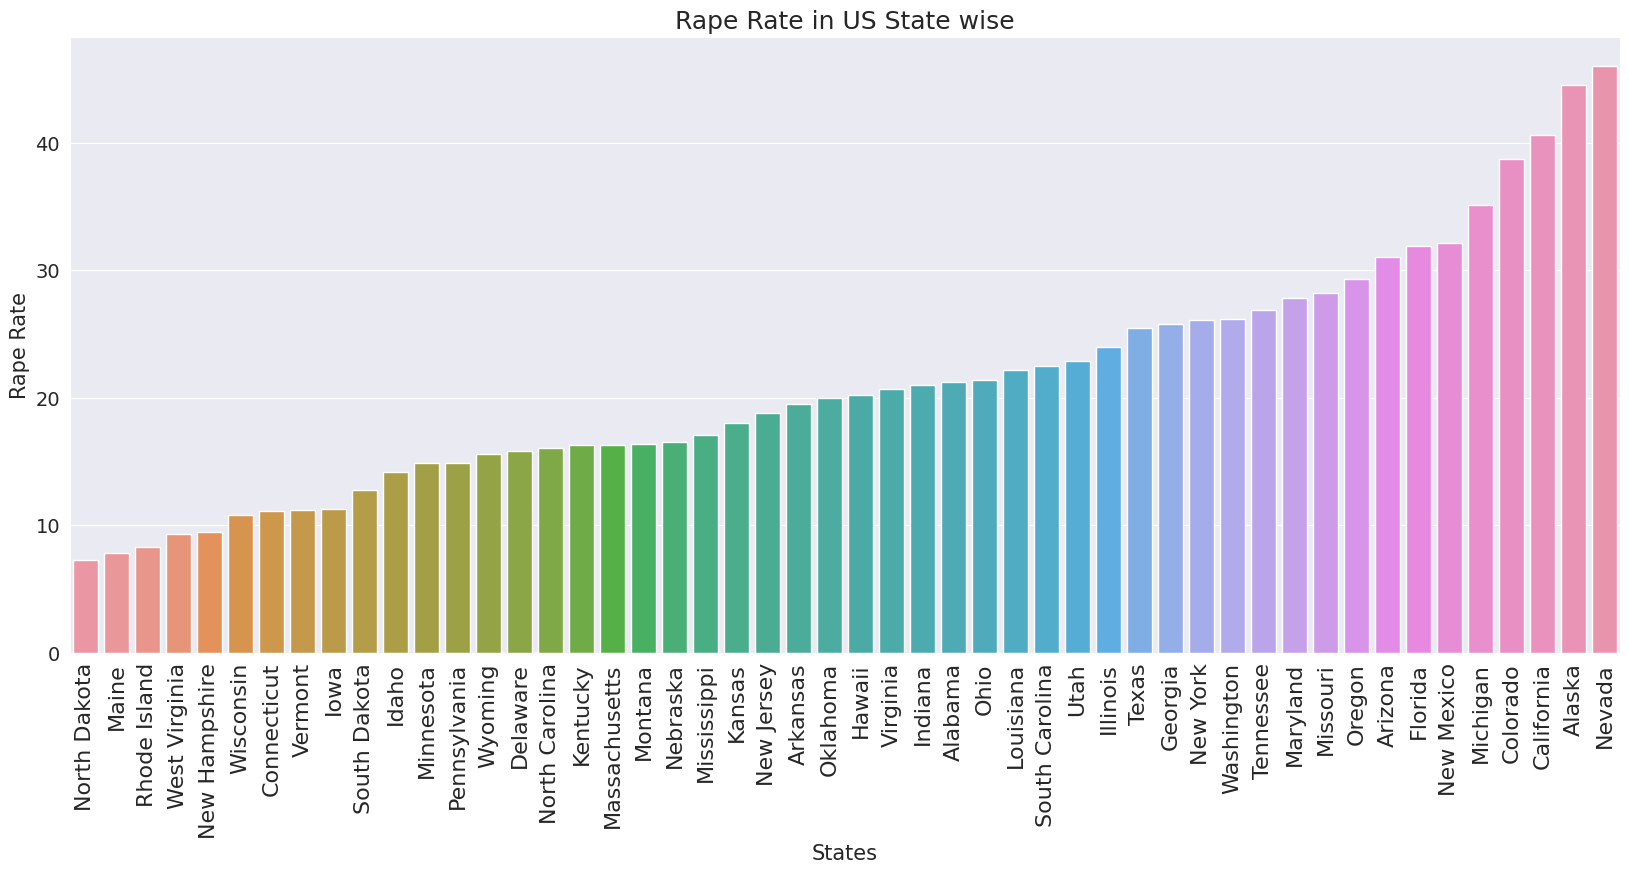

In [ ]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sb.barplot(x='States',
            y="Rape",
            data=data,
            order=data.sort_values('Rape').States)
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Rape Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Rape Rate in US State wise", size=18)
plt.show()

In [ ]:
print('Top 10 States with Highest Rape Rate')
data.sort_values('Rape',ascending=False, ignore_index=True).head(10)

Top 10 States with Highest Rape Rate


,States,Murder,Assault,UrbanPop,Rape
0,Nevada,12.2,252,81,46.0
1,Alaska,10.0,263,48,44.5
2,California,9.0,276,91,40.6
3,Colorado,7.9,204,78,38.7
4,Michigan,12.1,255,74,35.1
5,New Mexico,11.4,285,70,32.1
6,Florida,15.4,335,80,31.9
7,Arizona,8.1,294,80,31.0
8,Oregon,4.9,159,67,29.3
9,Missouri,9.0,178,70,28.2


In [ ]:
print('Top 10 States with Lowest Rape Rate')
data.sort_values('Rape',ascending=True, ignore_index=True).head(10)

Top 10 States with Lowest Rape Rate


,States,Murder,Assault,UrbanPop,Rape
0,North Dakota,0.8,45,44,7.3
1,Maine,2.1,83,51,7.8
2,Rhode Island,3.4,174,87,8.3
3,West Virginia,5.7,81,39,9.3
4,New Hampshire,2.1,57,56,9.5
5,Wisconsin,2.6,53,66,10.8
6,Connecticut,3.3,110,77,11.1
7,Vermont,2.2,48,32,11.2
8,Iowa,2.2,56,57,11.3
9,South Dakota,3.8,86,45,12.8


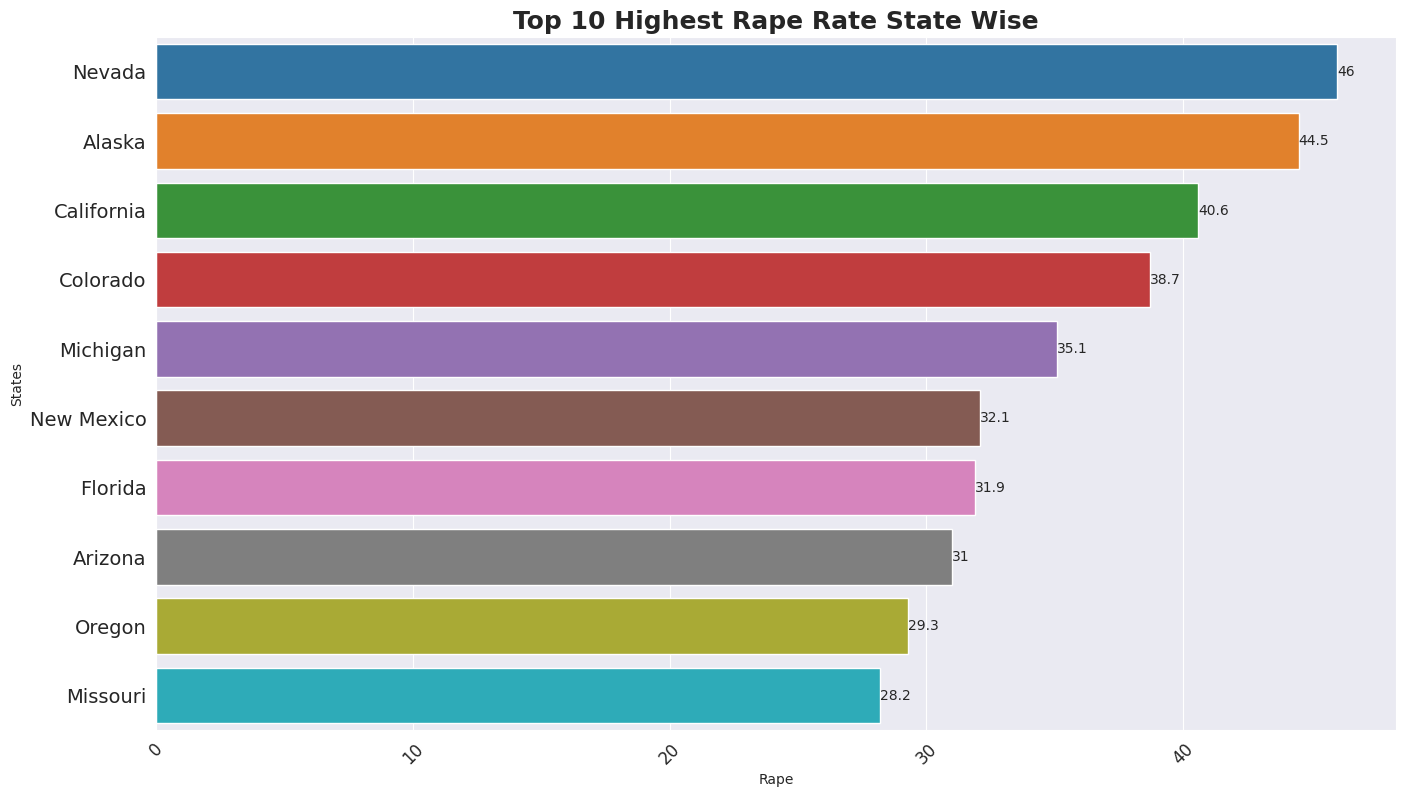

In [ ]:
Rape = data.sort_values('Rape', ascending = False)
plt.figure(figsize = (16,9))
ax = sb.barplot(x = Rape.Rape[:10], y = Rape.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Highest Rape Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)


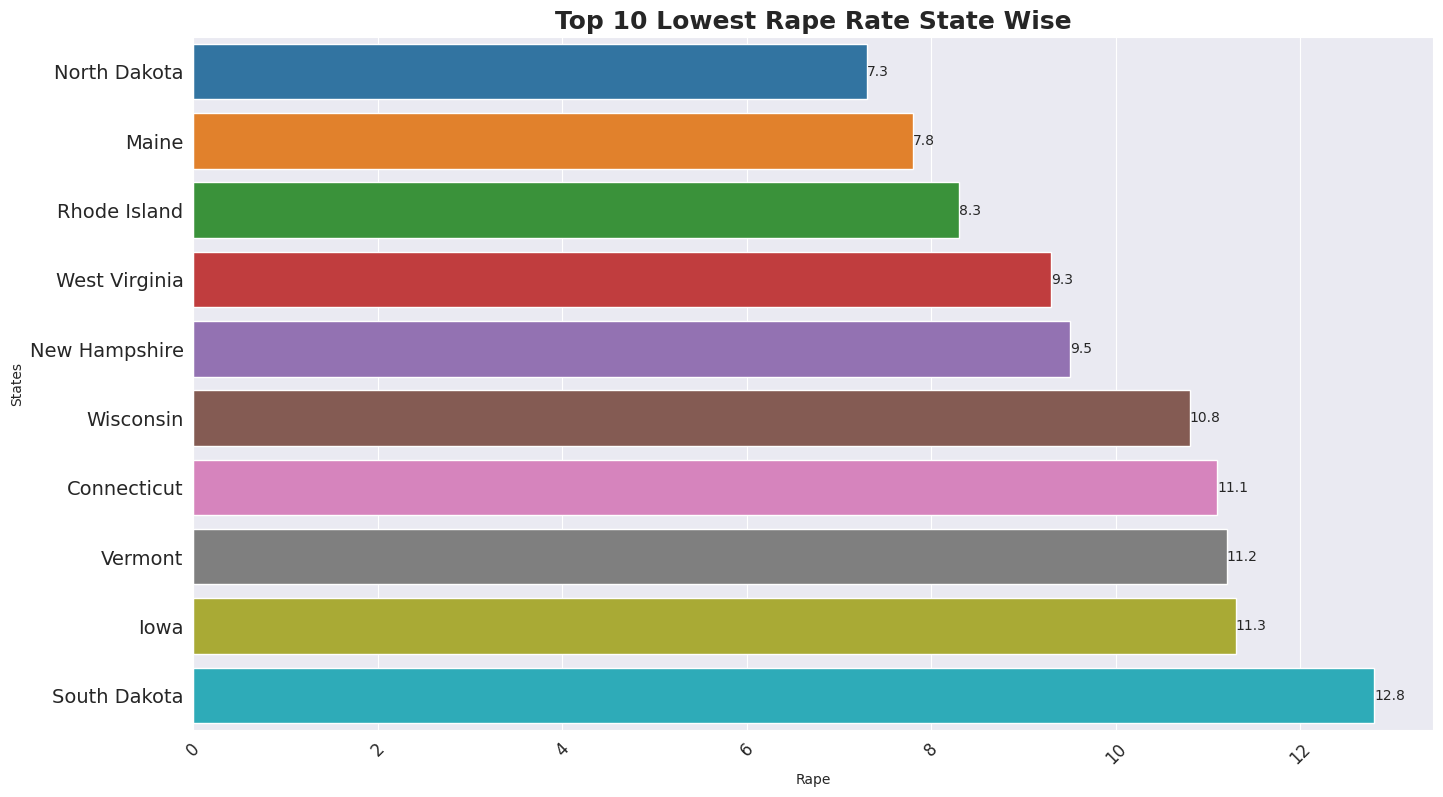

In [ ]:
rape = data.sort_values('Rape', ascending = True)
plt.figure(figsize = (16,9))
ax = sb.barplot(x = rape.Rape[:10], y = rape.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Lowest Rape Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

## Urban Population Rate

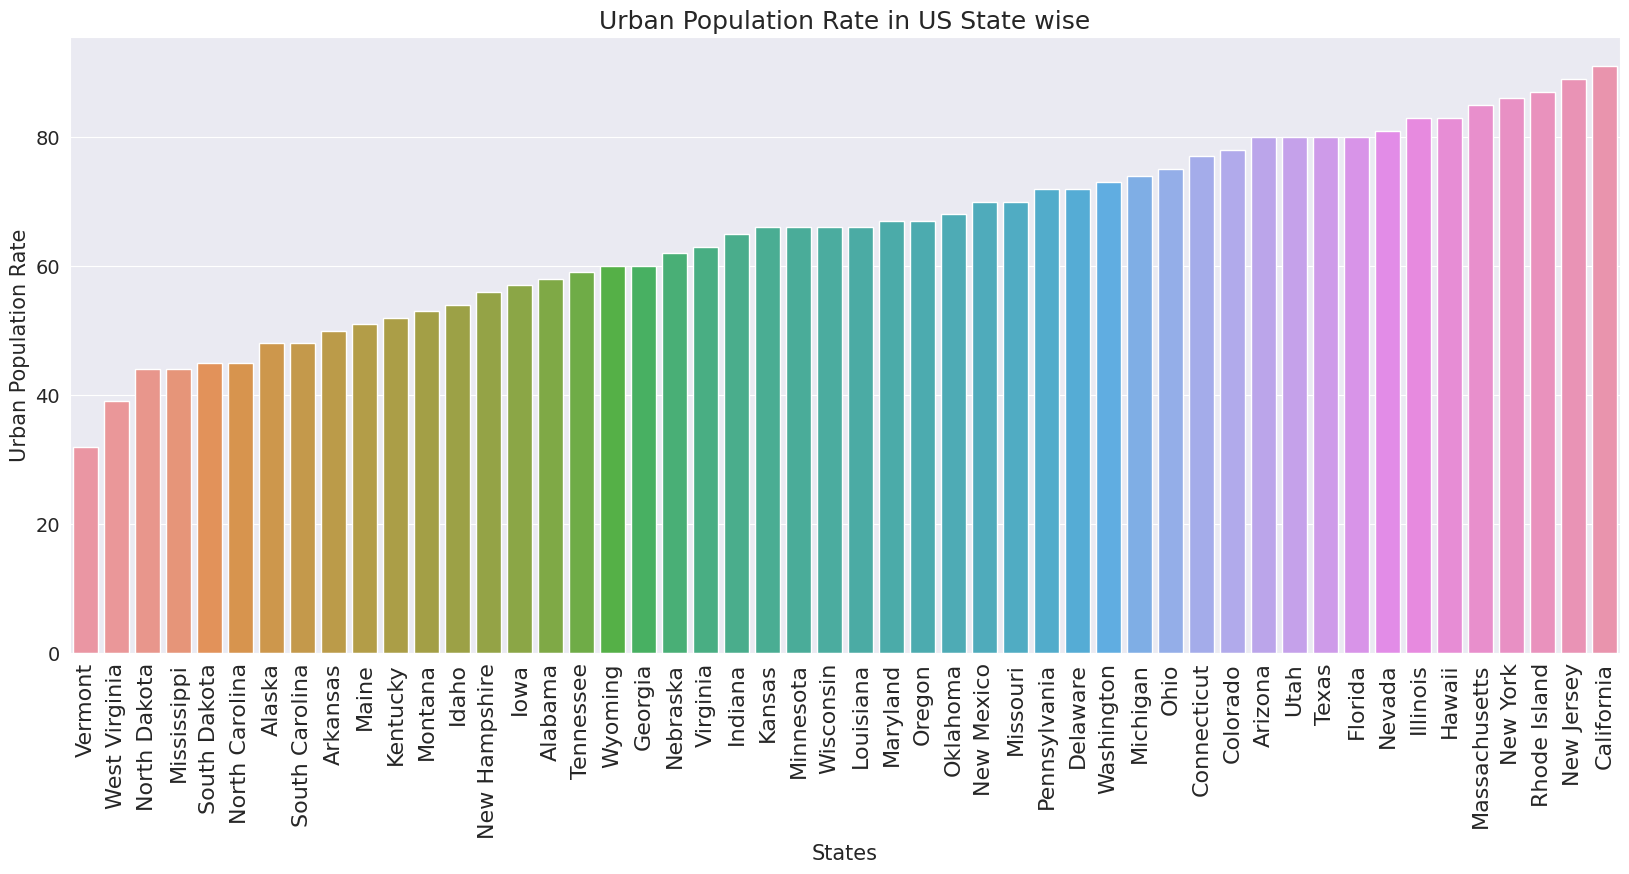

In [ ]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sb.barplot(x='States',
            y="UrbanPop",
            data=data,
            order=data.sort_values('UrbanPop').States)
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Urban Population Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Urban Population Rate in US State wise", size=18)
plt.show()


In [ ]:
print('Top 10 States with Highest Urban Population Rate')
data.sort_values('UrbanPop',ascending=False, ignore_index=True).head(10)

Top 10 States with Highest Urban Population Rate


,States,Murder,Assault,UrbanPop,Rape
0,California,9.0,276,91,40.6
1,New Jersey,7.4,159,89,18.8
2,Rhode Island,3.4,174,87,8.3
3,New York,11.1,254,86,26.1
4,Massachusetts,4.4,149,85,16.3
5,Hawaii,5.3,46,83,20.2
6,Illinois,10.4,249,83,24.0
7,Nevada,12.2,252,81,46.0
8,Texas,12.7,201,80,25.5
9,Arizona,8.1,294,80,31.0


In [ ]:
print('Top 10 States with Lowest Urban Population Rate')
data.sort_values('UrbanPop',ascending=True, ignore_index=True).head(10)

Top 10 States with Lowest Urban Population Rate


,States,Murder,Assault,UrbanPop,Rape
0,Vermont,2.2,48,32,11.2
1,West Virginia,5.7,81,39,9.3
2,North Dakota,0.8,45,44,7.3
3,Mississippi,16.1,259,44,17.1
4,South Dakota,3.8,86,45,12.8
5,North Carolina,13.0,337,45,16.1
6,Alaska,10.0,263,48,44.5
7,South Carolina,14.4,279,48,22.5
8,Arkansas,8.8,190,50,19.5
9,Maine,2.1,83,51,7.8


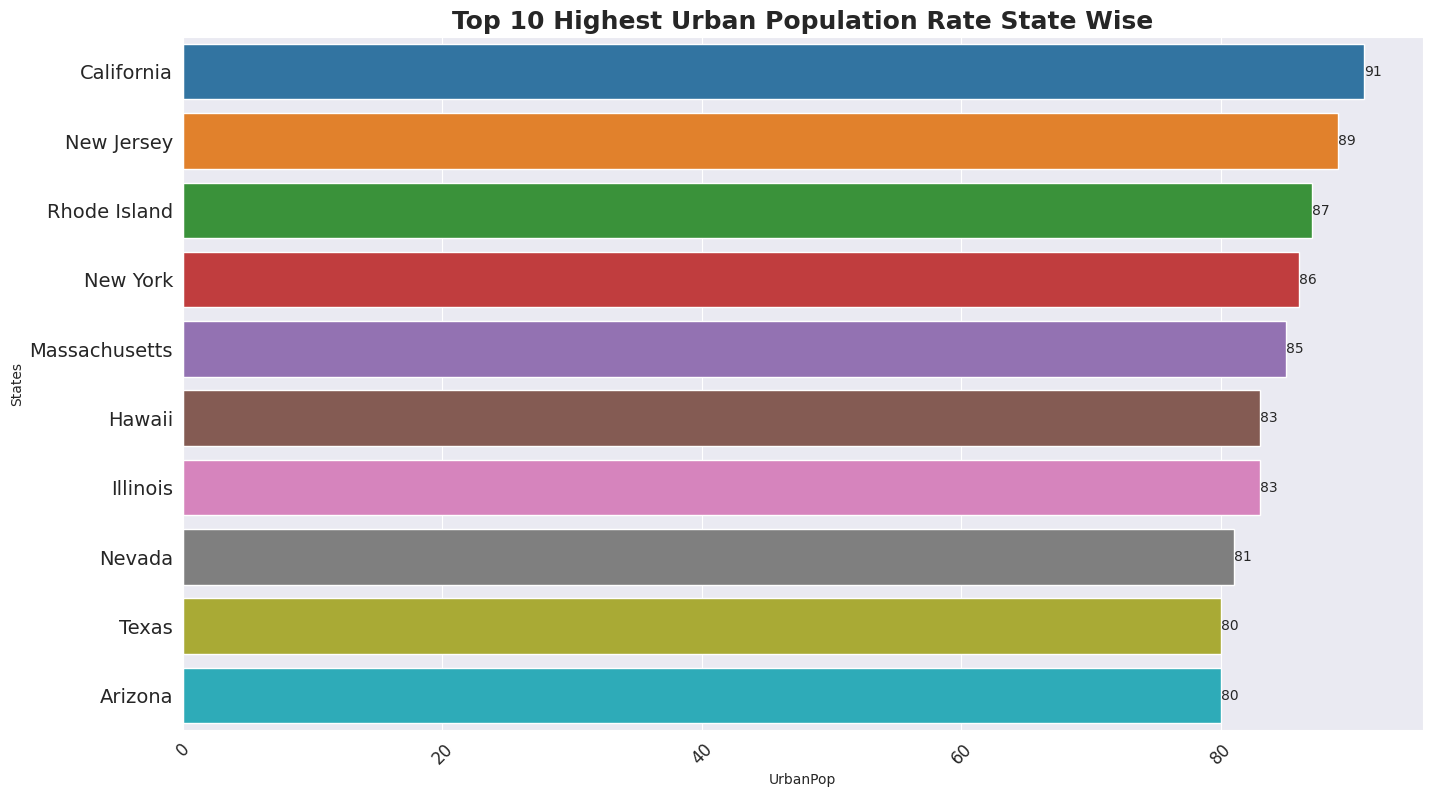

In [ ]:
urbanpop = data.sort_values('UrbanPop', ascending = False)
plt.figure(figsize = (16,9))
ax = sb.barplot(x = urbanpop.UrbanPop[:10], y = urbanpop.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Highest Urban Population Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

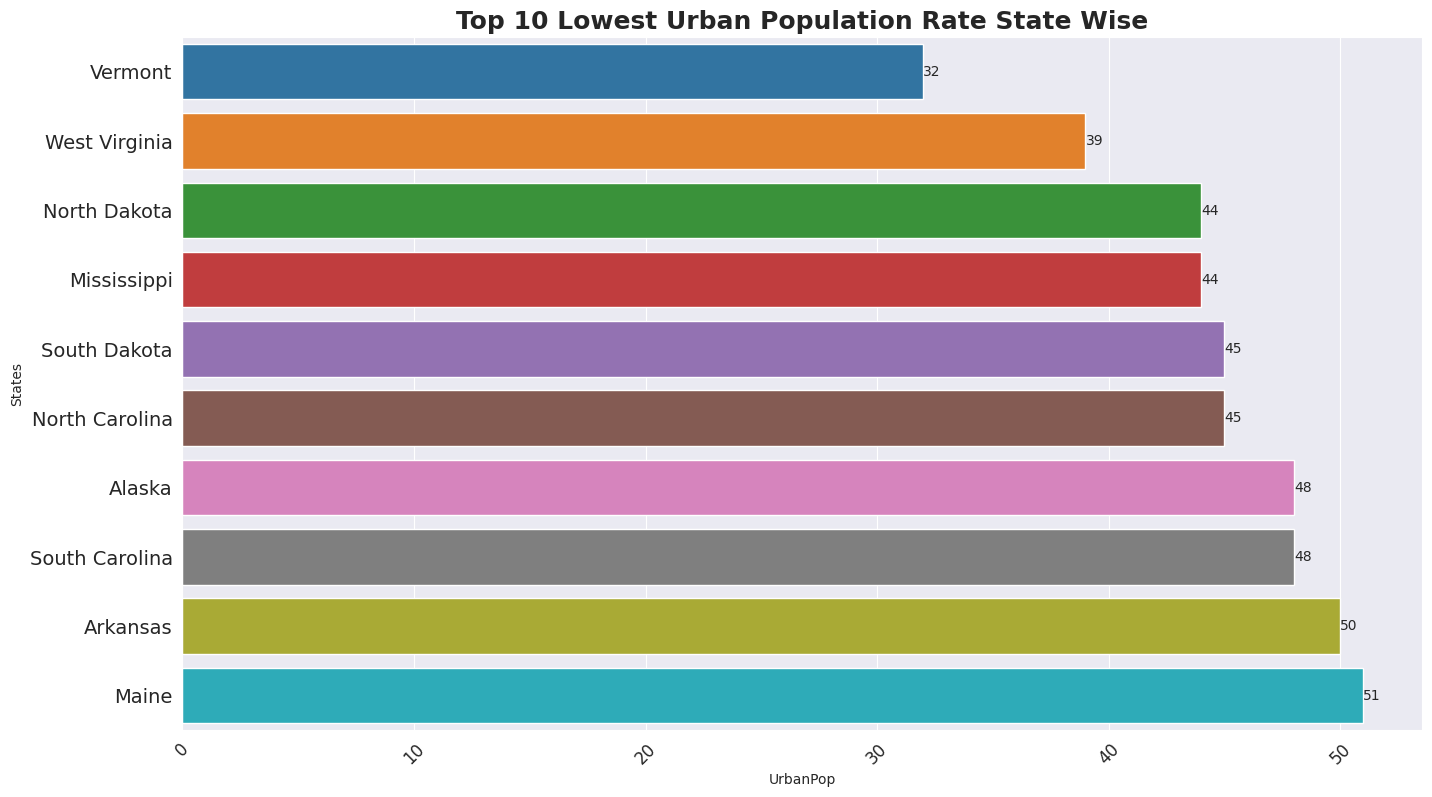

In [ ]:
UrbanPop = data.sort_values('UrbanPop', ascending = True)
plt.figure(figsize = (16,9))
ax = sb.barplot(x = UrbanPop.UrbanPop[:10], y = UrbanPop.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Lowest Urban Population Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
X = df.iloc[:, 1:]
X

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


## **Standardizing the Data**


In [ ]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = pd.DataFrame(SS.fit_transform(X))
SS_X

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


## Elbow Method

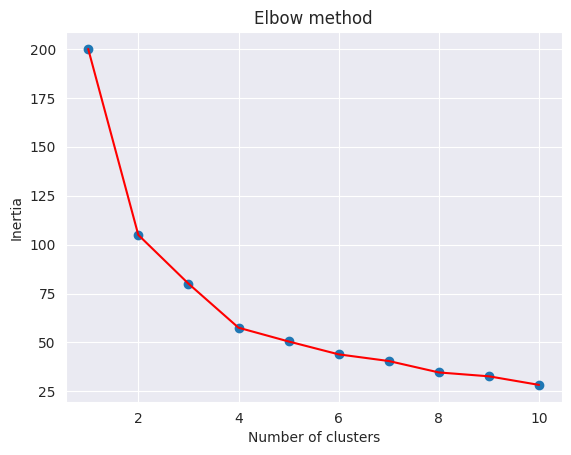

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1,11) :
    km = KMeans(n_clusters = i, random_state = 0 )
    km.fit(SS_X)
    inertia.append(km.inertia_)

plt.scatter(range(1,11), inertia)
plt.plot(range(1,11), inertia, color = 'red')
plt.title("Elbow method")
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.show()


# KMeans Clustering

In [ ]:
# K-means clustering
from sklearn.cluster import  KMeans
KMeans = KMeans(n_clusters = 5, n_init = 30)
KMeans.fit(SS_X)
Y = KMeans.predict(SS_X)
Y = pd.DataFrame(Y)
Y

,0
0,3
1,0
2,0
3,4
4,0
5,0
6,2
7,4
8,0
9,3


In [ ]:
KMeans.inertia_

50.0204259780583

In [ ]:
df1 = df.copy()
df1

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [ ]:
df1['clust'] = Y
df1

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,4
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,4
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,3


#  

In [ ]:
import sklearn
sklearn.metrics.silhouette_score(SS_X, Y)

0.3068468000198128

# **Hierarchical Clustering**

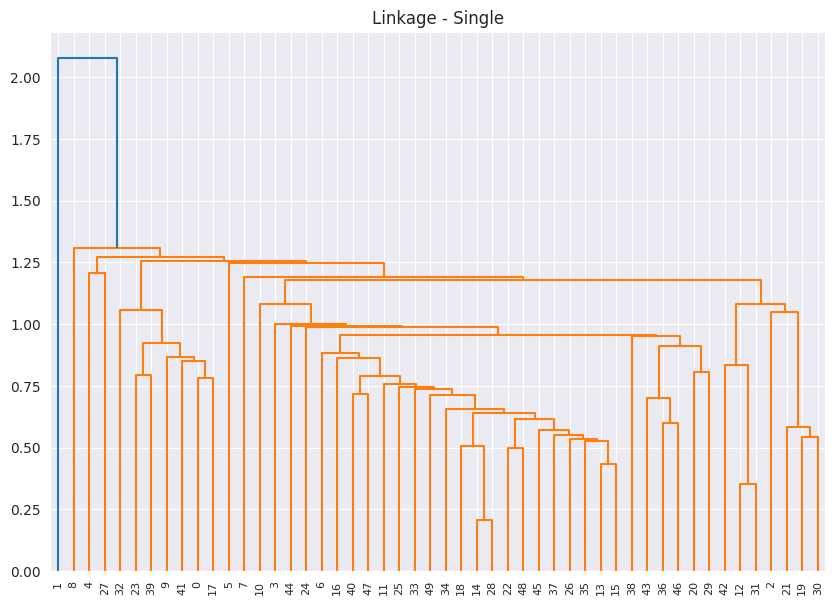

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
plt.title("Linkage - Single")
dend_S = shc.dendrogram(shc.linkage(SS_X, method = "single"))

In [ ]:
# Forming a group using clusters
from sklearn.cluster import AgglomerativeClustering
cluster_single = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage = "single")
single = cluster_single.fit_predict(SS_X)
single = pd.DataFrame(single)
single.value_counts()


0    49
1     1
dtype: int64

In [ ]:
silhouette_single = silhouette_score(SS_X, single)
print("The silhouette score for single linkage :", silhouette_single)

The silhouette score for single linkage : 0.23455598753159795


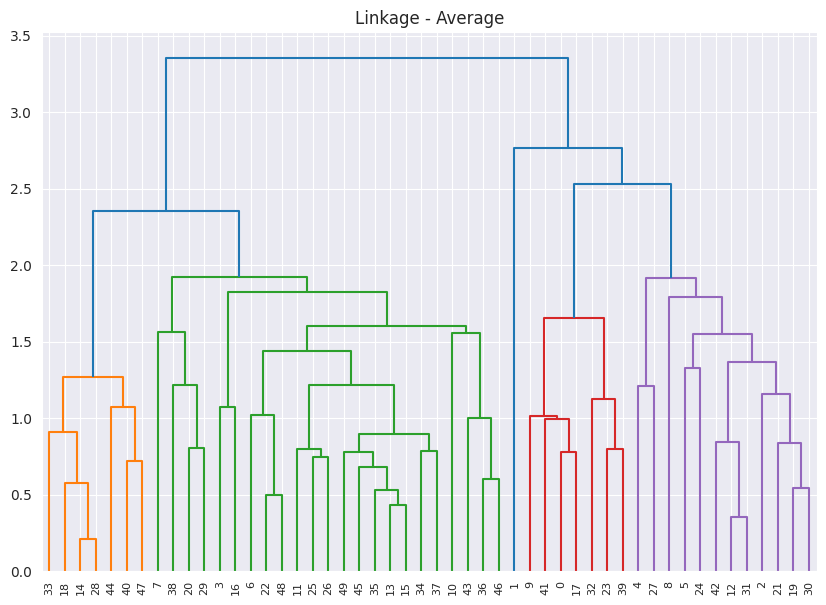

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
plt.title("Linkage - Average")
dend_A = shc.dendrogram(shc.linkage(SS_X, method = "average"))

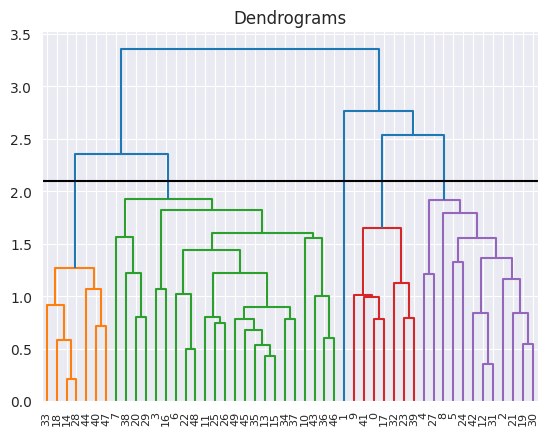

In [ ]:
# Creating Dendrogram for our data
# max_d = cut-off/ Threshold value
max_d = 2.1

Z = hierarchy.linkage(SS_X, method='average')
plt.figure()
plt.title("Dendrograms")
dendrogram = hierarchy.dendrogram(Z)

# Cutting the dendrogram at max_d
plt.axhline(y=max_d, c='k')


In [ ]:
# Forming a group using clusters
from sklearn.cluster import AgglomerativeClustering
cluster_avg = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage = "average")
average = cluster_avg.fit_predict(SS_X)
average = pd.DataFrame(average)
average.value_counts()


0    30
1    12
3     7
2     1
dtype: int64

In [ ]:
silhouette_avg = silhouette_score(SS_X, average)
print("The silhouette score for average linkage :", silhouette_avg)

The silhouette score for average linkage : 0.3636819420151221


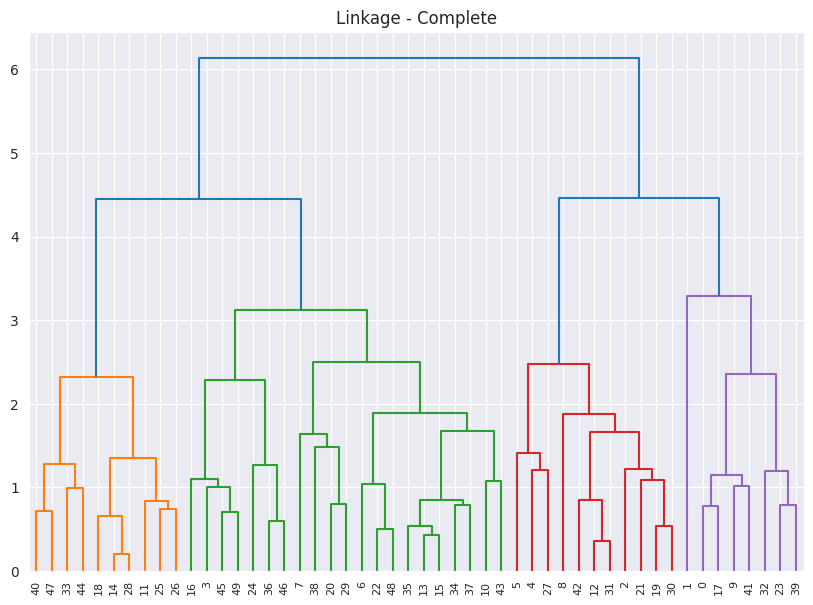

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
plt.title("Linkage - Complete")
dend_C = shc.dendrogram(shc.linkage(SS_X, method = "complete"))

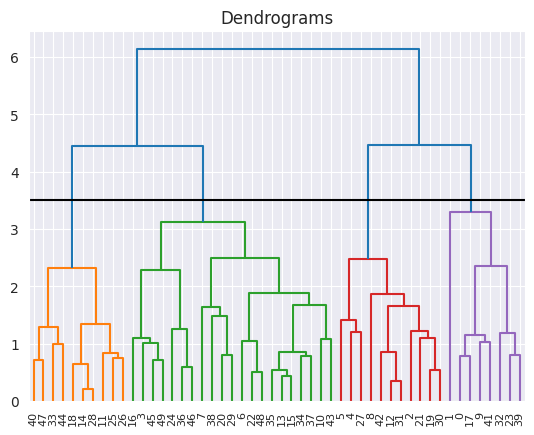

In [ ]:
# Creating Dendrogram for our data
# max_d = cut-off/ Threshold value
max_d = 3.5

Z = hierarchy.linkage(SS_X, method='complete')
plt.figure()
plt.title("Dendrograms")
dendrogram = hierarchy.dendrogram(Z)

# Cutting the dendrogram at max_d
plt.axhline(y=max_d, c='k')


In [ ]:
# Forming a group using clusters
from sklearn.cluster import AgglomerativeClustering
cluster_complete = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage = "complete")
complete = cluster_complete.fit_predict(SS_X)
complete = pd.DataFrame(complete)
complete.value_counts()


1    21
2    11
3    10
0     8
dtype: int64

In [ ]:
silhouette_complete = silhouette_score(SS_X, complete)
print("The silhouette score for complete linkage :", silhouette_complete)

The silhouette score for complete linkage : 0.31595507426164543


#  

# DBSCAN

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors = 8)
nbrs = neigh.fit(SS_X)
distances, indices = nbrs.kneighbors(SS_X)

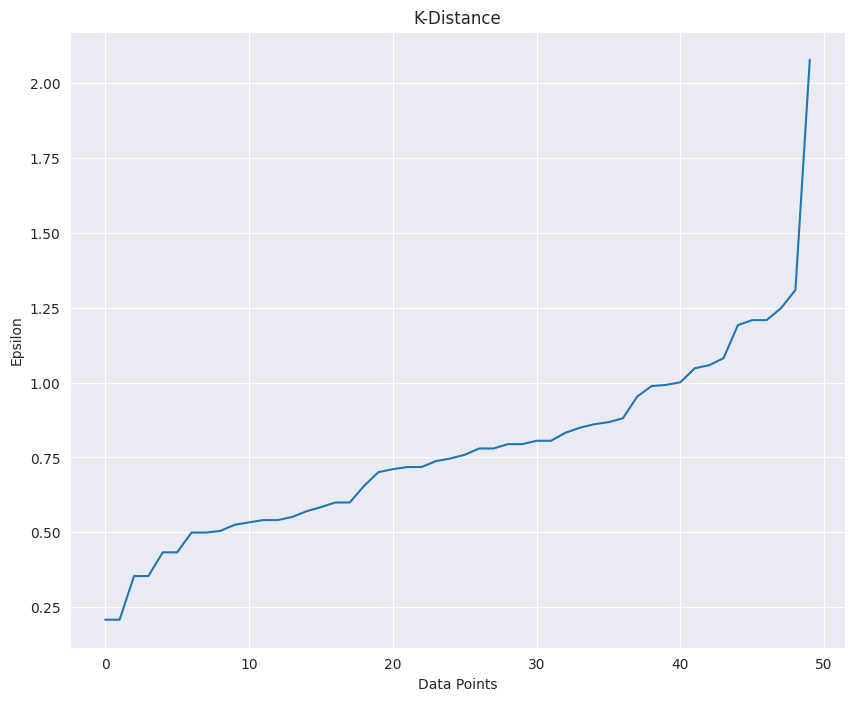

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,8))
plt.plot(distances)
plt.title("K-Distance")
plt.xlabel("Data Points")
plt.ylabel("Epsilon")
plt.show()

In [ ]:
dbscan = DBSCAN(eps = 1.2, min_samples = 5)
dbscan.fit(SS_X)

DBSCAN(eps=1.2)

In [ ]:
# Noise samples are given the label -1
d1 = dbscan.labels_
d1

array([ 0, -1, -1,  1, -1, -1,  1,  1, -1,  0,  1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
c1 = pd.DataFrame(dbscan.labels_, columns = ['Cluster'])
c1.head()

,Cluster
0,0
1,-1
2,-1
3,1
4,-1


In [ ]:
c1.value_counts()

Cluster
 1         32
-1         13
 0          5
dtype: int64

In [ ]:
df2 = df.copy()
df2 = pd.concat([df, c1], axis = 1)
df2.head(10)

,States,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0


In [ ]:
sklearn.metrics.silhouette_score(SS_X, d1)

0.27881927066240825

In [ ]:
df2.groupby('Cluster').agg(['mean']).reset_index()

,Cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.384615,274.076923,71.307692,31.615385
1,0,14.720000,232.600000,58.200000,23.720000
2,1,5.243750,119.125000,64.343750,16.625000


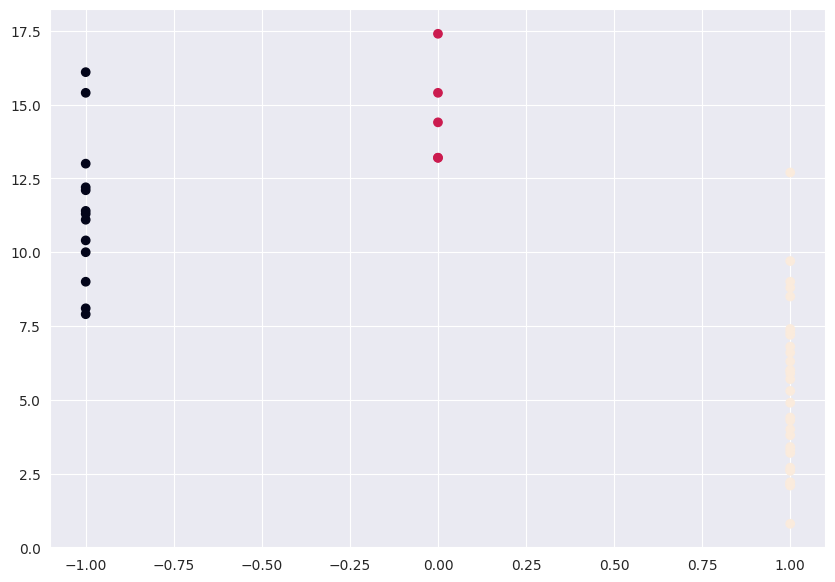

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(df2['Cluster'], df2['Murder'], c=dbscan.labels_)

#    

## **Silhouette Scores table**

In [ ]:
silhouette_scores = {
    'Method': ['Complete linkage', 'Single linkage', 'Average linkage', 'K-means', 'DBSCAN'],
    'Silhouette_Score': [0.31, 0.23, 0.36, 0.30, 0.20]
}

silhouette_table = pd.DataFrame(silhouette_scores)

# Display the DataFrame
print(silhouette_table)


             Method  Silhouette_Score
0  Complete linkage              0.31
1    Single linkage              0.23
2   Average linkage              0.36
3           K-means              0.30
4            DBSCAN              0.20


In [ ]:
max_silhouette = silhouette_table[silhouette_table['Silhouette_Score'] == silhouette_table['Silhouette_Score'].max()]
print(max_silhouette)

            Method  Silhouette_Score
2  Average linkage              0.36


# **Inference**

##### I have applied EDA to analyze the data
##### Applied Standardazation to transform the data
##### I have used three clustering techniques, they are :
##### 1) KMeans
##### 2) Hierarchical Clusterig
##### 3) DBSCAN.
##### By applying different clustering techniques, I discovered that the **Complete**  linkage method is  appeared to produce better-defined and more distinct clusters compared to Single, Complete linkage, K-means, and DBSCAN, as evidenced by their higher Silhouette scores.